<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRABALHANDO-COM-DAOS-06/blob/main/Gustavo_Bezerra_Classifica%C3%A7%C3%A3o_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes.\
Característica do dataset: todos os pacientes são mulheres com pelo menos 21 anos de ascendência indígena Pima.

##Importe as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Leia o conjunto de dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amandaacacio/DatasetsML/main/diabetes.csv')

##Faça EDA básico, para os primeiros entendimentos do dataset

In [3]:
len(df)

768

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Verifique se existem dados ausentes no dataframe e faça as alterações necessárias

In [12]:
# Verificando a existencia de valores nulos:

print(df.isnull().sum())

# Não existem valores nulos, nem categóricos, porém, existem valores "0" em algumas
# colunas essenciais para o diagnóstico, o que indica uma informação não preenchida.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
#Substitui então os valores "0" por nulo, pra ficar mais fácil de fazer uma segunda substituição depois.`
df_copia = df.copy(deep = True)
df_copia[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copia[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [18]:
print(df_copia.info())
print(df_copia.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age        

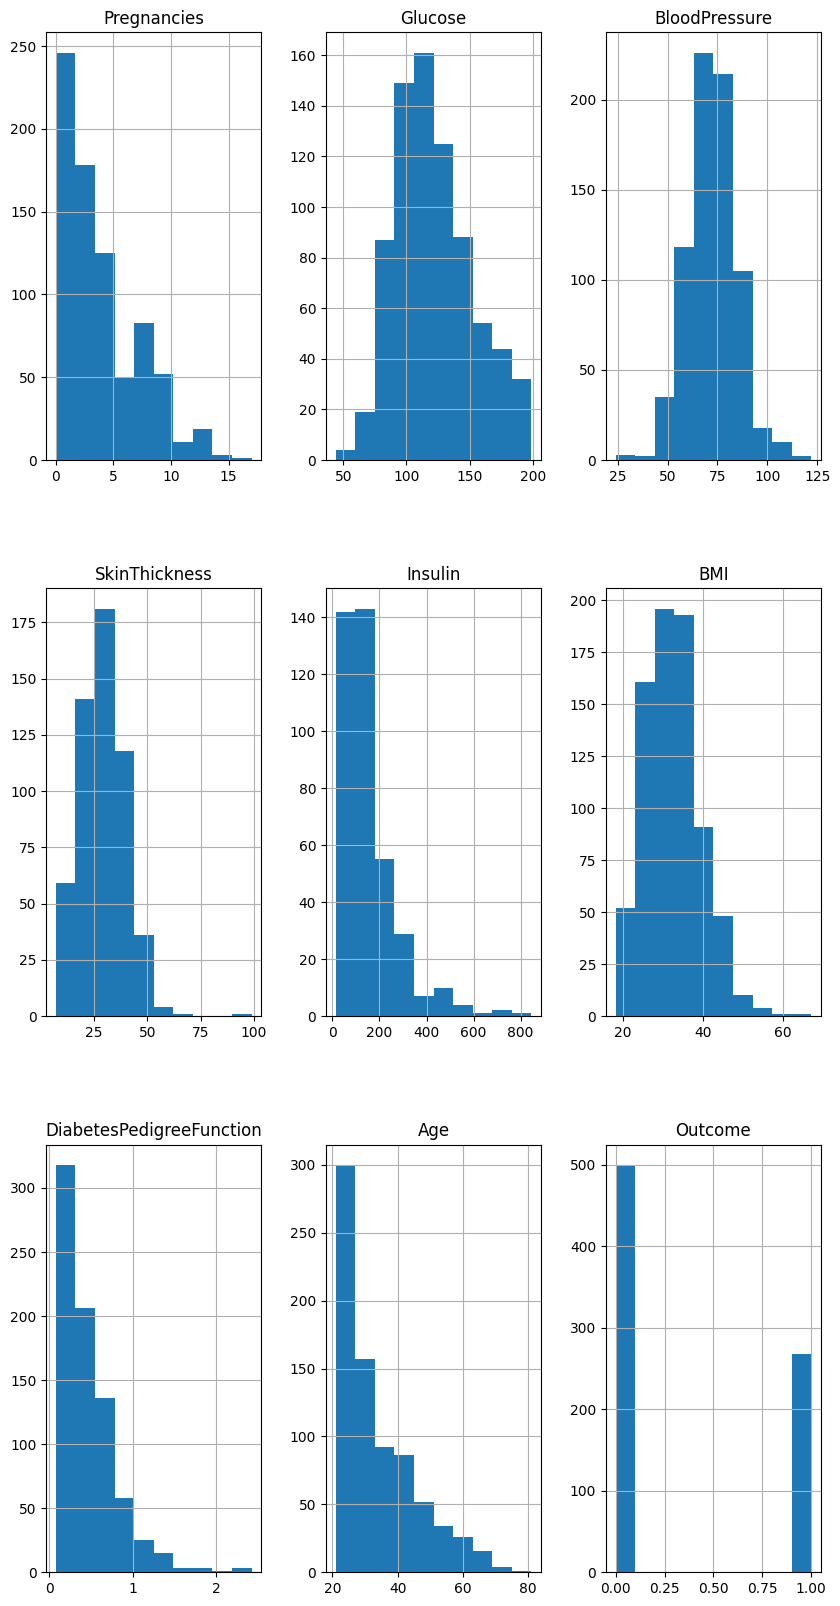

In [19]:
#Plotei então as funções de distribuição de cada feature que substitui o 0 por "Nan"
#para entender como substituir esses valores nulos.

p = df_copia.hist(figsize = (10,20))

In [20]:
#De acordo com a distribuição de cada feature, decidi substituir os valores nulos por métodos diferentes.
df_copia['Glucose'].fillna(df_copia['Glucose'].mean(), inplace = True) #média
df_copia['BloodPressure'].fillna(df_copia['BloodPressure'].mean(), inplace = True) #média
df_copia['SkinThickness'].fillna(df_copia['SkinThickness'].median(), inplace = True) #mediana
df_copia['Insulin'].fillna(df_copia['Insulin'].median(), inplace = True) #mediana
df_copia['BMI'].fillna(df_copia['BMI'].median(), inplace = True) #mediana

##Verifique se existem valores duplicados no dataframe e faça as alterações necessárias

In [23]:
# Verificando a exitencia de valores duplicados:

df_copia.duplicated().sum()

# Não existe valores duplicados, caso contrario usariamos:
#  df_copia = df_copia.drop_duplicates()

0

##No variável que queremos prever, existem outliers? Trate-os caso seja necessário

In [25]:
# Usando um novo df para avaliarmos as colunas do df original
df_melted = df_copia.melt(value_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome'],
var_name='Columns', value_name='Values')

<Axes: xlabel='Columns', ylabel='Values'>

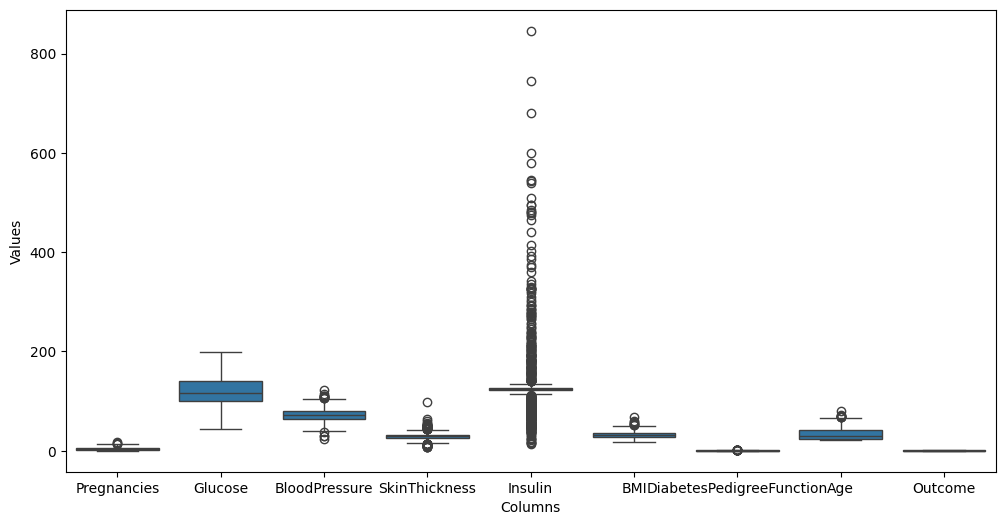

In [26]:
# Analisando a ecistencia de outleirs em todas as colunas
plt.figure(figsize=(12, 6))  # largura x altura em polegadas
sns.boxplot(x='Columns', y='Values', data=df_melted)

In [27]:
def remove_outliers_iqr(df):

    df_cleaned = df_copia.copy()

    for column in df_cleaned.select_dtypes(include=[np.number]).columns:

        # Calcule o Q1 (1º quartil) e Q3 (3º quartil)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)

        # Calcule o IQR (Intervalo Interquartil)
        IQR = Q3 - Q1

        # Determine os limites inferior e superior para os outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtre os dados para remover outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

In [38]:
df_cleaned = remove_outliers_iqr(df_copia)

In [39]:
df_cleaned.shape

(332, 9)

<Axes: xlabel='Age'>

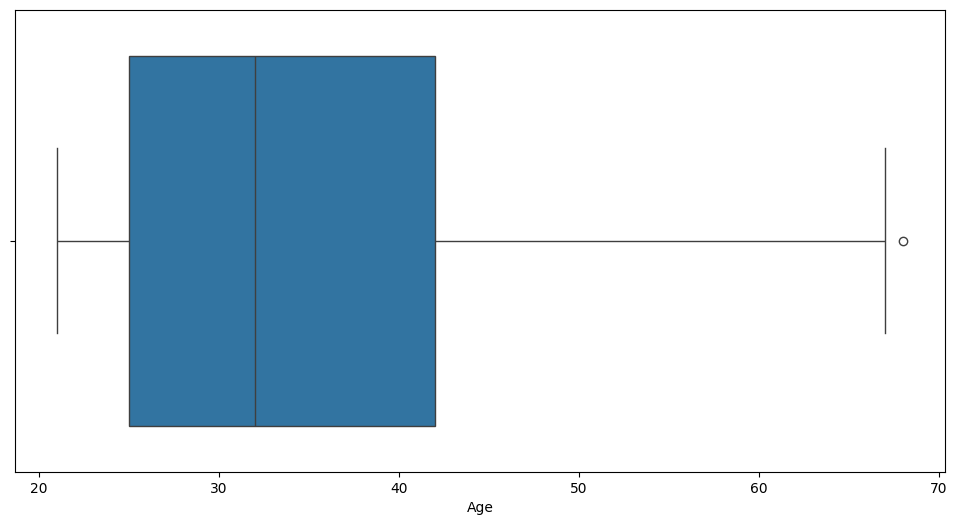

In [69]:
# Analisando a ecistencia de outleirs em Age e Insulina
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['Age'])

<Axes: xlabel='Insulin'>

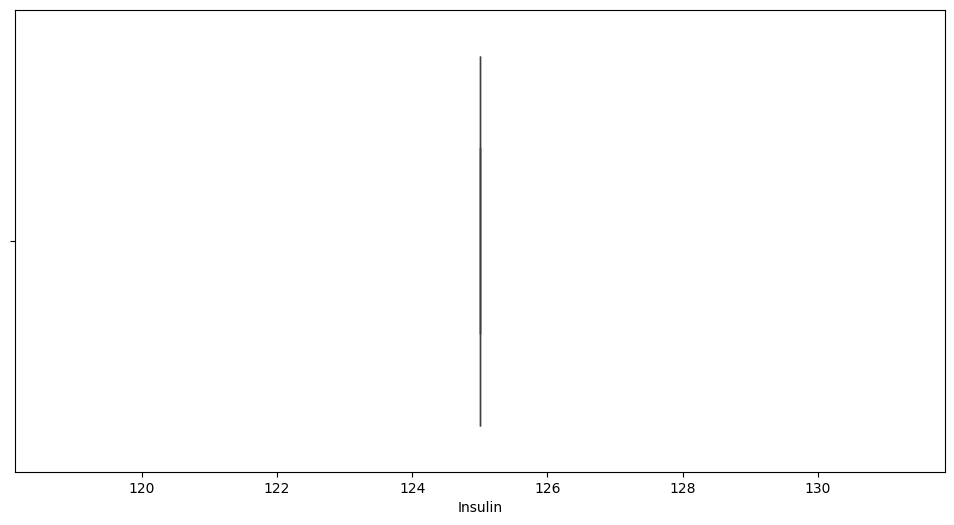

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['Insulin'])

In [71]:
df_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,332.000000,332.000000,332.000000,332.000000,332.0,332.000000,332.000000,332.000000,332.000000
mean,4.361446,118.818515,73.606539,28.933735,125.0,31.383434,0.367702,35.376506,0.346386
std,3.348186,29.194780,10.223268,4.219986,0.0,6.061731,0.215653,12.340332,0.476536
min,0.000000,44.000000,48.000000,15.000000,125.0,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,68.000000,29.000000,125.0,27.075000,0.205750,25.000000,0.000000
50%,4.000000,114.000000,72.405184,29.000000,125.0,31.400000,0.291000,32.000000,0.000000
75%,7.000000,135.250000,80.000000,29.000000,125.0,35.125000,0.501500,42.000000,1.000000
max,13.000000,196.000000,104.000000,42.000000,125.0,47.900000,1.022000,68.000000,1.000000


##Normalize os dados

In [72]:
#Definindo o X e o y
y = df_clean['Outcome']
df_clean.drop(['Outcome'],axis=1,inplace=True)
X = df_clean

In [73]:
from sklearn.preprocessing import StandardScaler
#Normalizando os dados
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

##Divida o dataset

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Treinando o Modelo



In [76]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)
lr_test_score = classifier_lr.score(X_test, y_test)
model_name = 'Logistic Regression'

##Avalie o Modelo (Regressão Logística): No caso que estamos classificando, em qual métrica de classificação devemos focar?

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Fazer previsões com os dados de teste
y_pred = classifier_lr.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.75

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        47
           1       0.62      0.40      0.48        20

    accuracy                           0.75        67
   macro avg       0.70      0.65      0.66        67
weighted avg       0.73      0.75      0.73        67



In [78]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)

[[42  5]
 [12  8]]


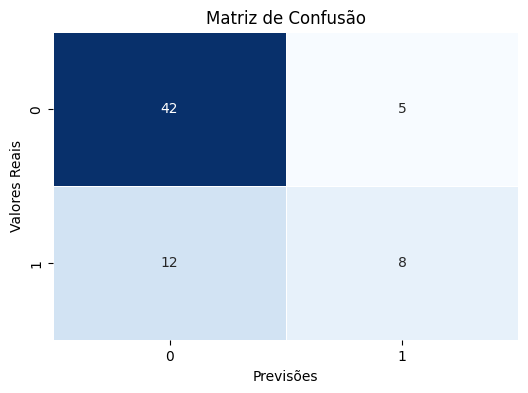

In [79]:
plt.figure(figsize=(6, 4))  # Define o tamanho da figura
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)

plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

##A Regressão Logística parece ser ideal para esse caso? Dica, teste outro modelo de classificação para comparar os resultados (Pesquise sobre o Random Forest Classification..)

In [80]:
from sklearn.ensemble import RandomForestClassifier

#Testando com vários n_estimators
acc_score = []
for ne in range(1, 50):
    classifier_rf = RandomForestClassifier(n_estimators=ne, random_state=0)
    classifier_rf.fit(X_train, y_train)
    rf_test_score = classifier_rf.score(X_test, y_test)
    acc_score.append(rf_test_score)

#Encontrando o n_estimador que retorma o melhor score
best_rf_acc = max(acc_score)
best_rf_ne = acc_score.index(max(acc_score))

#Modelo com n_estimador que retorna o melhor score
classifier_rf = RandomForestClassifier(n_estimators=best_rf_ne, random_state=0)
classifier_rf.fit(X_train, y_train)
rf_test_score = classifier_rf.score(X_test, y_test)

model_name = 'Random Forest with ' + str(best_rf_ne) + ' estimators'

In [81]:
# Fazer previsões com os dados de teste
y_pred = classifier_rf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.76

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        47
           1       0.64      0.45      0.53        20

    accuracy                           0.76        67
   macro avg       0.72      0.67      0.68        67
weighted avg       0.75      0.76      0.75        67



In [83]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)

[[42  5]
 [11  9]]


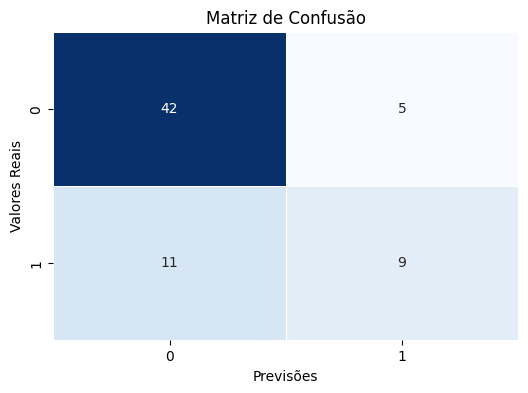

In [82]:
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))  # Define o tamanho da figura
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)

plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()